In [1]:
from src.make_db import create_movies_db

In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [3]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("data/movies.db")

### Cleaning Movie budgets

In [4]:
pd.read_sql("""
SELECT *
FROM tn_movie_budgets
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idx                5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [5]:
df_tmb = pd.read_sql("""
SELECT *
FROM tn_movie_budgets
""", conn)

In [6]:
df_tmb["production_budget"] = df_tmb["production_budget"].apply(lambda x: int(x.replace("$", "").replace(",", "")))
df_tmb["domestic_gross"] = df_tmb["domestic_gross"].apply(lambda x: int(x.replace("$", "").replace(",", "")))
df_tmb["worldwide_gross"] = df_tmb["worldwide_gross"].apply(lambda x: int(x.replace("$", "").replace(",", "")))

In [7]:
df_tmb["worldwide_profit"] = df_tmb["worldwide_gross"] - df_tmb["production_budget"]

In [8]:
df_tmb = df_tmb[df_tmb["domestic_gross"] >= 1]
df_tmb = df_tmb[df_tmb["worldwide_gross"] >= 1]

In [9]:
df_tmb = df_tmb.drop(columns = ["id", "domestic_gross"])

In [10]:
df_tmb = df_tmb.set_index("idx")

In [11]:
df_tmb["title"] = df_tmb["movie"]

In [12]:
df_tmb = df_tmb.drop(columns = ["movie"])

In [13]:
df_tmb

,release_date,production_budget,worldwide_gross,worldwide_profit,title
idx,,,,,
0,"Dec 18, 2009",425000000,2776345279,2351345279,Avatar
1,"May 20, 2011",410600000,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides
2,"Jun 7, 2019",350000000,149762350,-200237650,Dark Phoenix
3,"May 1, 2015",330600000,1403013963,1072413963,Avengers: Age of Ultron
4,"Dec 15, 2017",317000000,1316721747,999721747,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...
5775,"May 26, 2006",7000,71644,64644,Cavite
5776,"Dec 31, 2004",7000,900,-6100,The Mongol King
5778,"Apr 2, 1999",6000,240495,234495,Following


### Cleaning title basics

In [14]:
pd.read_sql("""
SELECT *
FROM imdb_title_basics
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [15]:
df_itb = pd.read_sql("""
SELECT *
FROM imdb_title_basics
""", conn)

In [16]:
df_itb = df_itb.drop(columns = ["original_title", "tconst"])

In [17]:
df_itb = df_itb.set_index("idx")

In [18]:
df_itb = df_itb.drop_duplicates()

In [19]:
df_itb["title"] = df_itb["primary_title"]

In [20]:
df_itb = df_itb.drop(columns = ["primary_title"])

In [21]:
df_itb["genres"] = df_itb["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
df_itb

,start_year,runtime_minutes,genres,title
idx,,,,
0,2013,175.0,"[Action, Crime, Drama]",Sunghursh
1,2019,114.0,"[Biography, Drama]",One Day Before the Rainy Season
2,2018,122.0,[Drama],The Other Side of the Wind
3,2018,NaN,"[Comedy, Drama]",Sabse Bada Sukh
4,2017,80.0,"[Comedy, Drama, Fantasy]",The Wandering Soap Opera
...,...,...,...,...
146139,2019,123.0,[Drama],Kuambil Lagi Hatiku
146140,2015,NaN,[Documentary],Rodolpho Teóphilo - O Legado de um Pioneiro
146141,2013,NaN,[Comedy],Dankyavar Danka


In [22]:
df_itb.isna().sum()

start_year             0
runtime_minutes    31679
genres              5395
title                  0
dtype: int64

In [23]:
df_itb = df_itb.dropna(subset = ["genres"])

In [24]:
df_itb = df_itb.explode("genres")

In [25]:
df_itb["genre"] = df_itb["genres"]

In [26]:
df_itb = df_itb.drop(columns = ["genres"])

In [27]:
df_itb.isna().sum()

start_year             0
runtime_minutes    35764
title                  0
genre                  0
dtype: int64

In [28]:
df_itb

,start_year,runtime_minutes,title,genre
idx,,,,
0,2013,175.0,Sunghursh,Action
0,2013,175.0,Sunghursh,Crime
0,2013,175.0,Sunghursh,Drama
1,2019,114.0,One Day Before the Rainy Season,Biography
1,2019,114.0,One Day Before the Rainy Season,Drama
...,...,...,...,...
146138,2019,NaN,The Secret of China,War
146139,2019,123.0,Kuambil Lagi Hatiku,Drama
146140,2015,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary


### Cleaning tmbd movies

In [29]:
df_tmbd = pd.read_sql("""
SELECT *
FROM tmdb_movies
""", conn)

In [30]:
df_tmbd.head()

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
df_tmbd = df_tmbd.drop(columns = ["genre_ids", "id", "original_language", "original_title"])

In [32]:
df_tmbd = df_tmbd.set_index("idx")

In [33]:
df_tmbd["vote_total"] = df_tmbd["vote_average"]*df_tmbd["vote_count"]

In [34]:
df_tmbd

,popularity,release_date,title,vote_average,vote_count,vote_total
idx,,,,,,
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,83067.6
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,58597.0
2,28.515,2010-05-07,Iron Man 2,6.8,12368,84102.4
3,28.005,1995-11-22,Toy Story,7.9,10174,80374.6
4,27.920,2010-07-16,Inception,8.3,22186,184143.8
...,...,...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0,1,0.0
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,0.0
26514,0.600,2018-10-01,The Last One,0.0,1,0.0


### Combine the above three dataframes

In [35]:
df_intermediate = df_tmbd.merge(df_itb, on = "title")

In [36]:
df_intermediate.isna().sum()

popularity            0
release_date          0
title                 0
vote_average          0
vote_count            0
vote_total            0
start_year            0
runtime_minutes    2158
genre                 0
dtype: int64

In [37]:
df_main = df_intermediate.merge(df_tmb, on = "title")

### Cleaning Main dataframe

In [38]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7965 entries, 0 to 7964
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         7965 non-null   float64
 1   release_date_x     7965 non-null   object 
 2   title              7965 non-null   object 
 3   vote_average       7965 non-null   float64
 4   vote_count         7965 non-null   int64  
 5   vote_total         7965 non-null   float64
 6   start_year         7965 non-null   int64  
 7   runtime_minutes    7540 non-null   float64
 8   genre              7965 non-null   object 
 9   release_date_y     7965 non-null   object 
 10  production_budget  7965 non-null   int64  
 11  worldwide_gross    7965 non-null   int64  
 12  worldwide_profit   7965 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 871.2+ KB


In [39]:
df_main = df_main.drop(columns = ["release_date_y", "start_year"])

In [40]:
df_main.head()

,popularity,release_date_x,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit
0,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,58597.0,98.0,Action,165000000,494870992,329870992
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,58597.0,98.0,Adventure,165000000,494870992,329870992
2,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,58597.0,98.0,Animation,165000000,494870992,329870992
3,28.515,2010-05-07,Iron Man 2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389
4,28.515,2010-05-07,Iron Man 2,6.8,12368,84102.4,124.0,Adventure,170000000,621156389,451156389


In [41]:
df_main.isna().sum()

popularity             0
release_date_x         0
title                  0
vote_average           0
vote_count             0
vote_total             0
runtime_minutes      425
genre                  0
production_budget      0
worldwide_gross        0
worldwide_profit       0
dtype: int64

In [42]:
df_main = df_main.dropna(subset = ["runtime_minutes"])

In [43]:
df_main["release_date"] = df_main["release_date_x"]

In [44]:
df_main = df_main.drop(columns = ["release_date_x"])

In [45]:
df_main["percent_returns"] = df_main["worldwide_gross"]/df_main["production_budget"]*100

In [46]:
df_main.head()

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns
0,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813
1,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Adventure,165000000,494870992,329870992,2010-03-26,299.921813
2,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Animation,165000000,494870992,329870992,2010-03-26,299.921813
3,28.515,Iron Man 2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111
4,28.515,Iron Man 2,6.8,12368,84102.4,124.0,Adventure,170000000,621156389,451156389,2010-05-07,365.386111


### Creating Visualizations

In [61]:
df_mainmean = df_main.groupby("genre").mean().sort_values("worldwide_profit", ascending = False)

In [62]:
df_mainmean = df_mainmean.reset_index()

In [63]:
df_mainmean

,genre,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns
0,Musical,13.085103,6.484615,2910.256410,20556.453846,107.743590,5.894872e+07,4.532096e+08,3.942609e+08,1721.940825
1,Animation,12.641709,6.374834,2422.251656,16972.533775,88.152318,9.122185e+07,3.504037e+08,2.591819e+08,1172.911460
2,Adventure,16.169933,6.305462,3491.500000,23840.046639,108.046218,9.777815e+07,3.221741e+08,2.243959e+08,440.955938
3,Fantasy,14.782741,6.094527,2958.850746,19563.953731,108.393035,7.315100e+07,2.974106e+08,2.242596e+08,740.854147
4,Sci-Fi,15.954870,6.239500,4053.185000,28214.655500,110.265000,7.725842e+07,2.791069e+08,2.018485e+08,353.264156
5,Family,9.345144,6.245673,1569.399038,10809.991346,82.846154,5.627913e+07,2.162368e+08,1.599577e+08,1388.899412
6,Action,14.445190,6.134568,2738.348765,18376.313580,111.510802,7.217253e+07,2.114375e+08,1.392650e+08,328.853805
7,Comedy,10.221461,6.231937,1426.323298,9599.721859,102.020942,3.712738e+07,1.243077e+08,8.718031e+07,458.238205
8,Sport,6.707345,6.425287,969.965517,6879.773563,97.149425,2.329310e+07,1.068685e+08,8.357541e+07,889.663949
9,Documentary,4.916249,6.139354,641.361217,4317.650000,55.608365,3.742313e+07,1.136329e+08,7.620976e+07,1709.177651


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

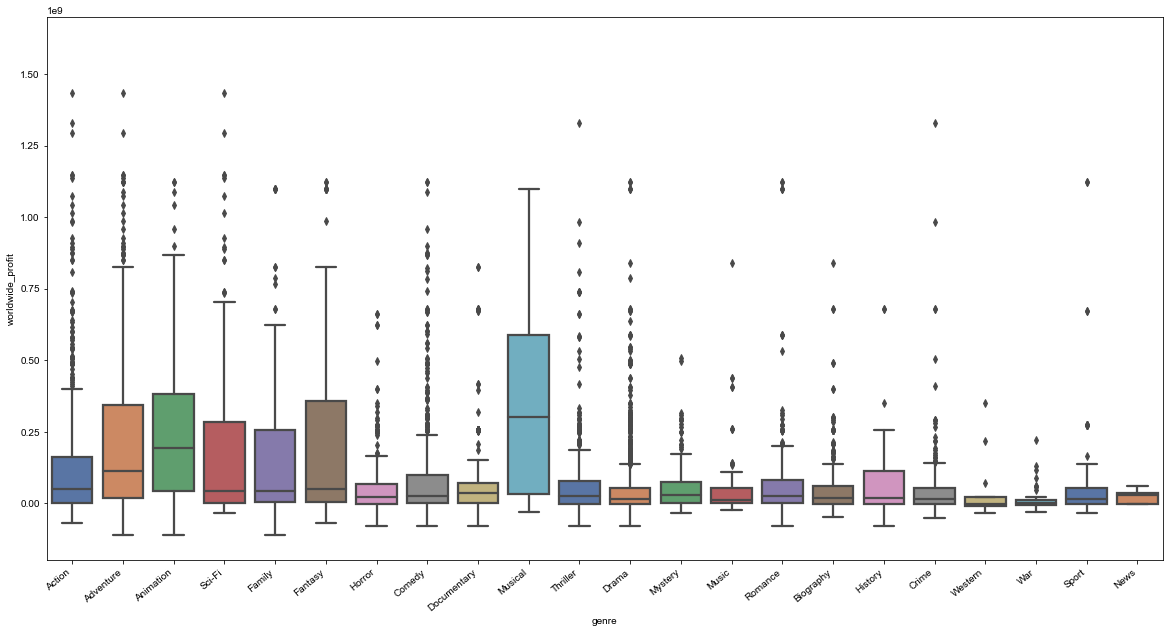

In [51]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.4)

sns.boxplot(data = df_main, x = "genre", y = "worldwide_profit", palette = "deep").set(ylim = (-200000000, 1700000000))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

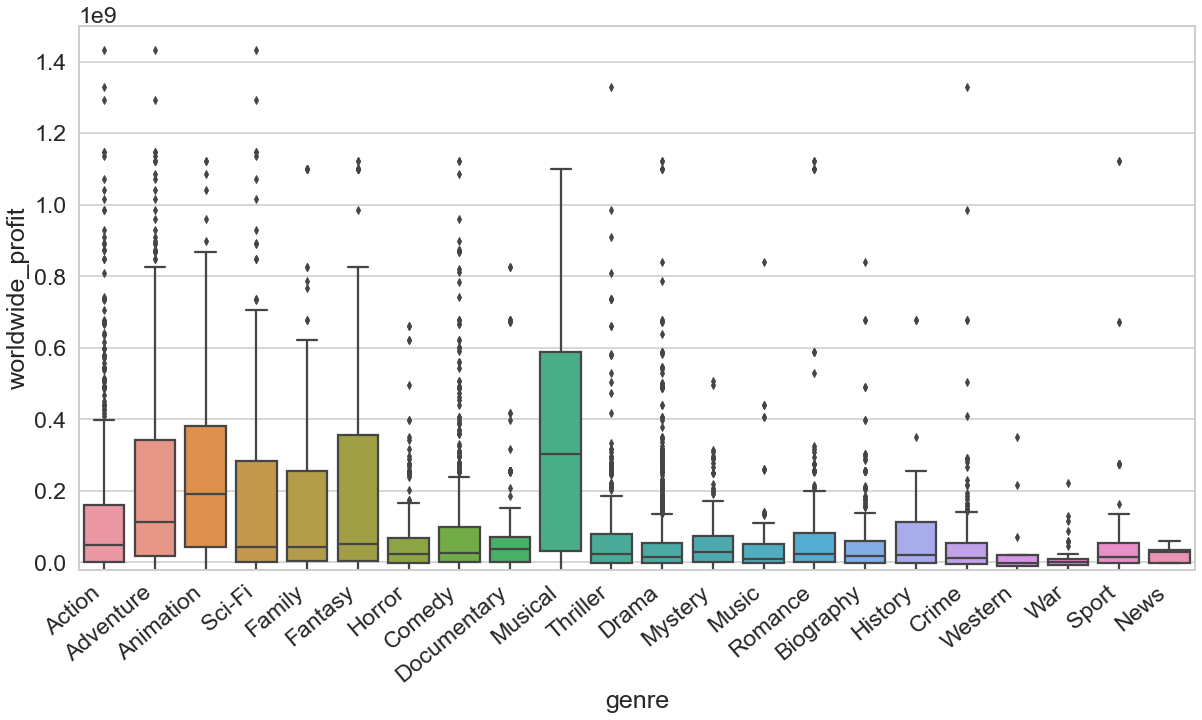

In [52]:
fig, ax = plt.subplots(figsize = (20,10))


sns.boxplot(data = df_main, x = "genre", y = "worldwide_profit").set(ylim = (-20000000, 1500000000))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

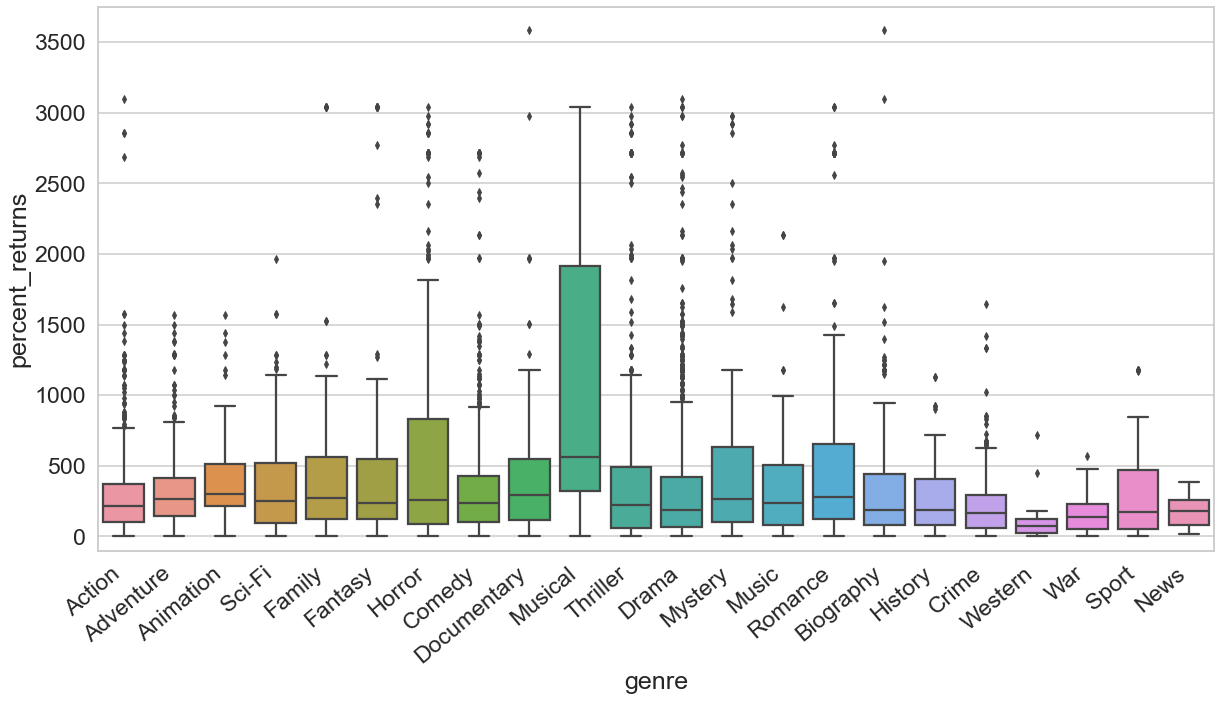

In [69]:
fig, ax = plt.subplots(figsize = (20,10))


sns.boxplot(data = df_main, x = "genre", y = "percent_returns").set(ylim = (-100, 3750))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

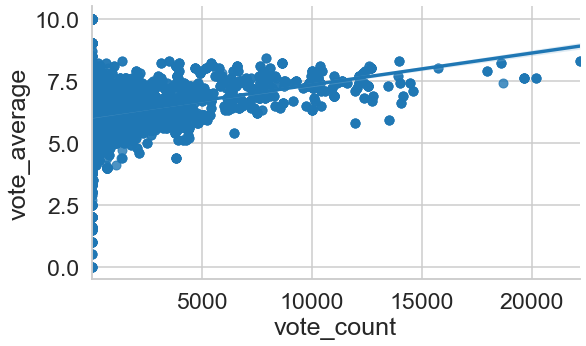

In [53]:
sns.lmplot(aspect=15/9, data = df_main, x = "vote_count", y = "vote_average");

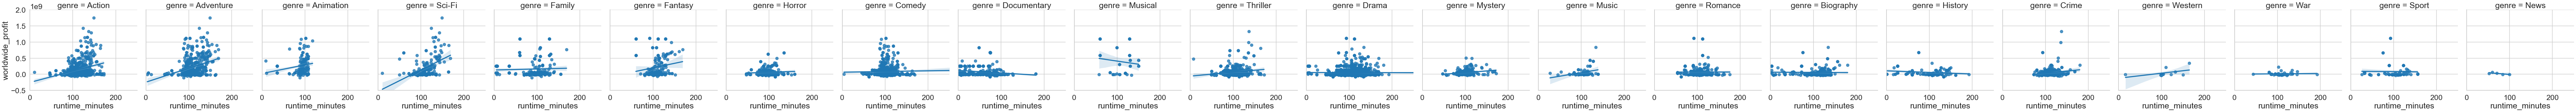

In [54]:
runtime = sns.lmplot(data = df_main, x = "runtime_minutes", y = "worldwide_profit", col = "genre")
runtime.set(ylim = (-500000000, 2000000000), xlim = (0, 250))

## Making top 7 dataframes

In [74]:
df_mainmean.sort_values("percent_returns", ascending = False).head(5)

,genre,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns
0,Musical,13.085103,6.484615,2910.256410,20556.453846,107.743590,5.894872e+07,4.532096e+08,3.942609e+08,1721.940825
9,Documentary,4.916249,6.139354,641.361217,4317.650000,55.608365,3.742313e+07,1.136329e+08,7.620976e+07,1709.177651
5,Family,9.345144,6.245673,1569.399038,10809.991346,82.846154,5.627913e+07,2.162368e+08,1.599577e+08,1388.899412
1,Animation,12.641709,6.374834,2422.251656,16972.533775,88.152318,9.122185e+07,3.504037e+08,2.591819e+08,1172.911460
13,Horror,8.682937,5.786280,1228.245383,7968.883641,96.182058,2.384002e+07,8.439122e+07,6.055119e+07,1144.383628


In [75]:
df_mainmean.sort_values("worldwide_profit", ascending = False).head(5)

,genre,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns
0,Musical,13.085103,6.484615,2910.256410,20556.453846,107.743590,5.894872e+07,4.532096e+08,3.942609e+08,1721.940825
1,Animation,12.641709,6.374834,2422.251656,16972.533775,88.152318,9.122185e+07,3.504037e+08,2.591819e+08,1172.911460
2,Adventure,16.169933,6.305462,3491.500000,23840.046639,108.046218,9.777815e+07,3.221741e+08,2.243959e+08,440.955938
3,Fantasy,14.782741,6.094527,2958.850746,19563.953731,108.393035,7.315100e+07,2.974106e+08,2.242596e+08,740.854147
4,Sci-Fi,15.954870,6.239500,4053.185000,28214.655500,110.265000,7.725842e+07,2.791069e+08,2.018485e+08,353.264156


In [76]:
df_main.head()

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns
0,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Action,165000000,494870992,329870992,2010-03-26,299.921813
1,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Adventure,165000000,494870992,329870992,2010-03-26,299.921813
2,28.734,How to Train Your Dragon,7.7,7610,58597.0,98.0,Animation,165000000,494870992,329870992,2010-03-26,299.921813
3,28.515,Iron Man 2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111
4,28.515,Iron Man 2,6.8,12368,84102.4,124.0,Adventure,170000000,621156389,451156389,2010-05-07,365.386111


In [81]:
df_main.to_csv("Prebuilt_stuff/data/main_data_compilation.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Prebuilt_stuff/data/main_data_compilation.csv'